In [1]:
from astropy.table import Table, join, MaskedColumn, vstack, Column
from matplotlib import pyplot as plt

import h5py
import numpy as np
import os
import fnmatch
import pandas as pd
from lightkurve import TessLightCurve
import astropy.units as u

/Users/Tobin/opt/anaconda3/envs/Jim/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/Tobin/.lightkurve/cache. Please move all the files in the legacy directory /Users/Tobin/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [9]:
with h5py.File('tic21002564_0.h5', 'r') as f:
    print(f.keys())
    print(f['lc'].keys())
    print(f['flares'].keys())
    print(f['injections'].keys())
    
    print(f['gp'].keys())
    
    flare_mask=f['lc']['flare_mask'][...]
    
    print(f["recovered"].attrs["inject_index"])
    
    recovered = f['recovered'][...]
    injected_amp = f['injections']['amps'][...]
    injected_fwhm = f['injections']['fwhms'][...]
    
recovered

<KeysViewHDF5 ['flares', 'gp', 'injections', 'lc', 'recovered']>
<KeysViewHDF5 ['flare_mask', 'flux', 'flux_err', 'time']>
<KeysViewHDF5 ['equivalent_durations', 'start_times', 'stop_times']>
<KeysViewHDF5 ['amps', 'fwhms', 'insert_points']>
<KeysViewHDF5 ['mu', 'variance']>
24


array([[False, False, False, False, False, False, False, False,  True,
        False,  True,  True, False,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True],
       [False, False, False,  True, False, False,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,

In [3]:
import sys
sys.path.append('/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/post_processing/')
sys.path.append('/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/')
from post import post_process


from post import calculate_completeness

from post import calculate_eds_of_injected_flares
from post import fit_completeness_function

In [4]:
calculate_eds_of_injected_flares(injected_amp, injected_fwhm)

/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/lupita.py:27: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/lupita.py:26: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/lupita.py:25: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/lupita.py:25: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


array([ 1.38950181,  1.89226874,  1.1831189 ,  0.18704523,  2.21218927,
        3.64694769,  2.59962265,  2.01765514,  6.46296613,  3.83497008,
        1.26480914,  4.73479287,  4.03865774,  3.41391656,  5.53164901,
       15.69038985, 10.85375281, 34.30024091, 13.81143786,  9.41520285,
        6.96687503, 17.25314455, 24.16580151, 20.92290062, 25.54417581,
        3.18912601, 13.60479097, 50.19673638, 22.88486951, 37.61570519])

In [5]:
calculate_completeness(recovered)



array([0.12, 0.2 , 0.12, 0.4 , 0.24, 0.44, 0.28, 0.44, 0.6 , 0.8 , 0.76,
       0.92, 0.92, 0.92, 0.92, 0.92, 0.96, 1.  , 0.96, 0.96, 0.96, 1.  ,
       1.  , 0.92, 0.88, 0.96, 0.92, 0.92, 0.88, 0.92])

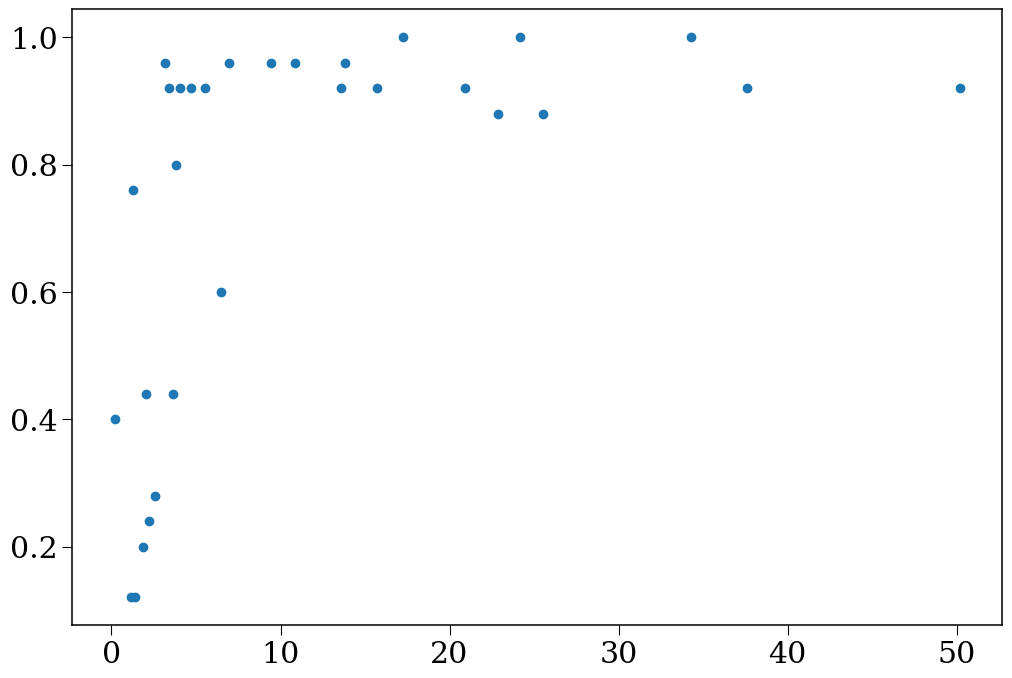

In [6]:
plt.scatter(calculate_eds_of_injected_flares(injected_amp, injected_fwhm), calculate_completeness(recovered))

In [7]:
fit_completeness_function(calculate_completeness(recovered), recovered, 
                          calculate_eds_of_injected_flares(injected_amp, injected_fwhm))

(array([0.1495276 , 0.15984049, 0.17071483, 0.18216056, 0.19418487,
        0.2067919 , 0.21998229, 0.23375294, 0.24809661, 0.26300171,
        0.27845201, 0.29442656, 0.3108995 , 0.32784011, 0.34521288,
        0.36297766, 0.38108994, 0.39950124, 0.41815952, 0.4370098 ,
        0.45599471, 0.47505521, 0.49413132, 0.51316285, 0.53209019,
        0.55085502, 0.56940104, 0.5876746 , 0.60562531, 0.62320657,
        0.64037591, 0.6570954 , 0.67333181, 0.68905678, 0.70424679,
        0.7188832 , 0.73295204, 0.74644384, 0.75935339, 0.77167944,
        0.78342435, 0.79459378, 0.80519629, 0.815243  , 0.8247472 ,
        0.83372404, 0.84219019, 0.85016351, 0.85766277, 0.86470739,
        0.87131723, 0.87751232, 0.88331273, 0.88873838, 0.89380894,
        0.89854365, 0.9029613 , 0.9070801 , 0.91091764, 0.91449086,
        0.917816  , 0.92090856, 0.92378336, 0.92645444, 0.92893515,
        0.9312381 , 0.93337522, 0.93535775, 0.93719626, 0.9389007 ,
        0.94048039, 0.94194409, 0.94329998, 0.94

In [ ]:
def get_lc_table(file_path):
    with h5py.File(file_path, 'r') as f:
        table_dict = {}
        for key in f["lc"].keys():
            table_dict[key] = f["lc"][key][...]
        table = Table(table_dict)
    return table

In [ ]:
weird_sector_tab=get_lc_table("tic21002564_3.h5")
weird_sector_tab

In [ ]:
weird_sector_tab[np.isnan(np.array(weird_sector_tab['flux']))]

In [ ]:
def count_sector_files_in_output_dir(directory, tic_id):
    count = 0
    for file in os.listdir(directory):
        if fnmatch.fnmatch(file, str(tic_id)+'*'):
            count += 1
    return count

count_sector_files_in_output_dir('/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/output/', 'tic21002564')

In [ ]:
with h5py.File('tic21002564_3.h5', 'r') as f:
    print(f.keys())
    print(f['lc'].keys())
    flare_mask=f['lc']['flare_mask'][...]
    
    print(f["recovered"].attrs["inject_index"])

In [ ]:
tic_id = 'tic21002564'
sectors_available = count_sector_files_in_output_dir('/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/output/', tic_id)

list_of_file_names = []

for i in range(1,sectors_available):
    list_of_file_names.append(f'{tic_id}_{i}.h5')
    
list_of_file_names 

In [ ]:

def copy_group(src, dest):
    """
    Recursively copy all contents from src group to dest group.
    """
    for name, item in src.items():
        if isinstance(item, h5py.Dataset):
            dest.copy(item, name)
        elif isinstance(item, h5py.Group):
            new_group = dest.create_group(name)
            copy_group(item, new_group)

def combine_hdf5_files(input_files, output_file):
    """
    Combine multiple HDF5 files into a single file. Each input file becomes its own group in the output file.
    
    Parameters:
    - input_files: List of paths to the input HDF5 files.
    - output_file: Path to the output HDF5 file.
    """
    with h5py.File(output_file, 'w') as h5_out:
        for file_path in input_files:
            # Use the file name (without extension) as the group name
            group_name = 'Sector'+os.path.splitext(os.path.basename(file_path))[0][11:]
            with h5py.File(file_path, 'r') as h5_in:
                # Create a new group in the output file for this input file
                new_group = h5_out.create_group(group_name)
                # Copy all contents from the input file to the new group
                copy_group(h5_in, new_group)



In [ ]:
combine_hdf5_files(list_of_file_names, 'test_output_file.h5')

In [ ]:
with h5py.File('test_output_file.h5', 'r') as f:
    print(f.keys())
    print(f['Sector_8'].keys())
    print(f['Sector_1']['injections'].keys())
    
    print(f['Sector_1']['injections']['amps'][:])
    
    print(len(f['Sector_1']['injections']['amps'][:]))
    print(len(f['Sector_1']['injections']['fwhms'][:]))
    
    print(f['Sector_2']['injections']['amps'][:])
    
    
    print(f['Sector_1']['injections']['fwhms'][:])
    
    print(f['Sector_1']['recovered'][:])
    print(f['Sector_1']['recovered'][:].shape)
    print(f['Sector_1']['injections']['insert_points'][:])
    print(np.median(f['Sector_1']['lc']['flux_err'][:])/ np.median(f['Sector_1']['lc']['flux'][:]))

# Tom messing with stuff here

In [ ]:
from importlib import reload

In [ ]:
import flair

In [ ]:
reload(flair)

In [ ]:
tlc = TessLightCurve(time=weird_sector_tab['time'], flux=weird_sector_tab['flux'], 
                     flux_err=weird_sector_tab['flux_err'])

In [ ]:
opt_gp, soln = flair.gp.fit_GP(tlc, flare_mask)



In [ ]:
soln

In [ ]:
opt_gp.mean

In [ ]:
with h5py.File('test_output_file.h5', 'r') as h5:
    sector_name = "Sector_9"
    print(sector_name)
    sector_group = h5[sector_name] 
    sector_specific_data[sector_name] = {}
    
    print(sector_group["gp"]["mu"][...])
    print(sector_group["gp"]["variance"][...])
    
    for dset_name in sector_group['flares'].keys():
        print(dset_name)
        dset = sector_group['flares'][dset_name][:]
        print(dset)
        sector_specific_data[sector_name][dset_name]= dset

    for dset_name in sector_group['lc'].keys():
        dset = sector_group['lc'][dset_name][:]
        sector_specific_data[sector_name][dset_name]= dset

    sector_recovered= sector_group['recovered'][:]
    sector_specific_data[sector_name]['recovered']= sector_recovered

# Tom stops messing here

In [ ]:
sector_specific_data = {}

with h5py.File('test_output_file.h5', 'r') as h5:
    for sector_name in h5.keys():  # Explicitly use .keys() to iterate over all groups
        print(sector_name)
        sector_group = h5[sector_name] 
        sector_specific_data[sector_name] = {}
        for dset_name in sector_group['flares'].keys():
            print(dset_name)
            dset = sector_group['flares'][dset_name][:]
            print(dset)
            sector_specific_data[sector_name][dset_name]= dset
            
        for dset_name in sector_group['lc'].keys():
            dset = sector_group['lc'][dset_name][:]
            sector_specific_data[sector_name][dset_name]= dset
        
        sector_recovered= sector_group['recovered'][:]
        sector_specific_data[sector_name]['recovered']= sector_recovered
            
sector_specific_data

In [ ]:
for sector in sector_specific_data:
    print(sector_specific_data[sector])

In [ ]:
for i in range(1,len(sector_specific_data)):
    print(sector_specific_data['Sector_'+str(i)]['equivalent_durations'])

In [ ]:
with h5py.File('test_output_file.hdf5', 'r') as f:
    s1_t=f['Sector_1']['lc']['time'][:]
    s1_amps=f['Sector_1']['injections']['amps'][:]
    s1_fwhms=f['Sector_1']['injections']['fwhms'][:]
    s1_comp=f['Sector_1']['recovered'][:]

In [ ]:
plt.scatter(np.arange(0,20),s1_amps)
plt.ylabel('Injected Flare Amplitude')
plt.show()

plt.scatter(np.arange(0,20),s1_fwhms)
plt.ylabel('Injected Flare FWHM')

In [ ]:
len(s1_comp[0])

In [ ]:
(np.sum(comp, axis=0)/len(comp))[:-5]

In [ ]:
from flair import lupita

In [ ]:
plt.scatter(np.arange(0,27, step=0.00138886),np.nan_to_num(lupita.flare_model(np.arange(0,27, step=0.00138886), np.median(10), s1_fwhms[-1], s1_amps[-1]), nan=0.0))

In [ ]:
from flair import flares
from scipy.integrate import trapezoid

In [ ]:
(trapezoid(x=dummy_time[7000:8000], y=model_flux[7000:8000])* u.day).to(u.s).value

In [ ]:
def calculate_completeness(amps, fwhms, recovered):
    """
    Calculate the completeness of the injected flares.
    
    Parameters:
    - amps: Array of flare amplitudes
    - fwhms: Array of flare FWHMs
    - recovered: Array of booleans indicating whether each flare was recovered
    
    Returns:
    - completeness: 2D array of the fraction of injected flares that were recovered 
    and the equivalent duration of the injected flares.
    """

    # Calculate the equivalent duration of the injected flares
    # Need a dummy time array to calculate the equivalent duration
    # Step size is mapped to TESS 2 minute cadence
    dummy_time=np.arange(0,27, step=0.00138886)
    
    injected_eds=np.zeros(len(amps))

    for i in range(len(amps)):
        model_flux=np.nan_to_num(lupita.flare_model(dummy_time, 10, fwhms[i],
                                      amps[i]), nan=0.0)
    
        injected_eds[i]=(trapezoid(x=dummy_time[7000:8000], y=model_flux[7000:8000])* u.day ).to(u.s).value


    completeness=(np.sum(recovered, axis=0)/len(recovered))
    

    return completeness, injected_eds

In [ ]:
c, ed = calculate_completeness(s1_amps, s1_fwhms, s1_comp)

plt.scatter(ed, c[:-5])

In [ ]:
calculate_completeness(new_amps, np.random.lognormal(mean=np.log(0.002), sigma=0.7, size=20), s1_comp)[1]

In [ ]:
s1_amps

In [ ]:
new_amps = np.geomspace(.004, 50 *.004, 30)

plt.scatter(np.linspace(1,30, 30), new_amps)

In [ ]:
#Investigating Why the GP is failing

import celerite2

In [ ]:
with h5py.File('tic21002564_3.h5', 'r') as f:
    print(f.keys())
    print(f['lc'].keys())
    flare_mask=f['lc']['flare_mask'][...]
    

In [ ]:
from flair.gp import fit_GP

In [ ]:
from lightkurve import TessLightCurve

In [ ]:
tlc = TessLightCurve(time=weird_sector_tab['time'], flux=weird_sector_tab['flux'], 
                     flux_err=weird_sector_tab['flux_err'])



In [ ]:
opt_gp, soln=fit_GP(tlc, flare_mask)

mu, variance = opt_gp.predict(y=tlc.flux.value[~flare_mask], t=tlc.time.value, return_var=True)

In [ ]:
mu

In [ ]:
soln

In [ ]:
plt.plot(tlc.time.value, mu)
plt.scatter(weird_sector_tab['time'], weird_sector_tab['flux'], color='k', alpha=.2)

In [ ]:
import tensorflow
import scipy


print("tensorflow:", tensorflow.__version__)

print('celerite:', celerite2.__version__)

print('numpy:', np.__version__)

print('scipy:', scipy.__version__)

In [ ]:
import keras
keras.__version__
